In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading  package

In [1]:
import tensorflow as tf
import cv2
import glob
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split

# Loading dataset

The dataset is used is the mnist fashion datase which is available in the kears dataset library

In [2]:
#mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
train,test=fashion_mnist .load_data()
data = train[0]
labels = train[1]
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

print("train labels : ",len(train_labels))
print("test labels",len(train_data))

print("val data",len(val_data))
print("val labels",len(val_labels))

print("test data :",len(test[0]))
print("test lables :",len(test[1]))

4422102/4422102 [==============================] - 0s 0us/step
train labels :  48000
test labels 48000
val data 12000
val labels 12000
test data : 10000
test lables : 10000


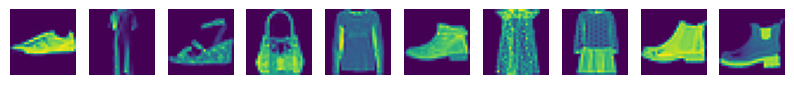

Label [7 3 5 8 6 9 3 3 9 9]


In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_data[i])
    plt.axis('off')
plt.show()

print('Label %s' % (train_labels[0:10]))

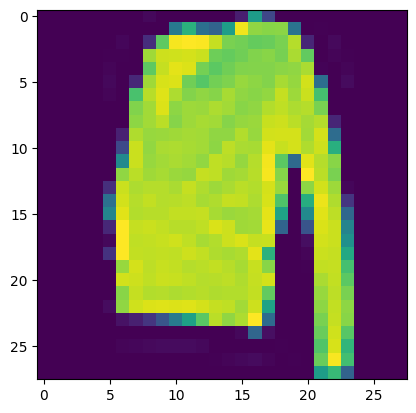

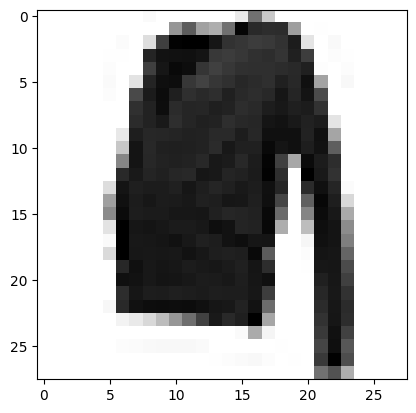

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[42])
plt.show()

# TO know wether it is a color image or binary image we have to plot it by changing the configuration
plt.imshow(train_data[42],cmap=plt.cm.binary)

# Checking the labels

In [6]:
print(train_labels)
print(test[1])

[7 3 5 ... 6 6 1]
[9 2 1 ... 8 1 5]


# Setting the labels

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Getting the shape of Image


In [8]:
train_data[1].shape

(28, 28)

## resizing  shape for all the images

In [9]:
Img_size = 28
train_data = np.array(train_data).reshape(-1,Img_size,Img_size,1)
val_data= np.array(val_data).reshape(-1,Img_size,Img_size,1)

print("Dimension shape  of Training ", train_data.shape)
print("Dimension shape of validation",val_data.shape)


Dimension shape  of Training  (48000, 28, 28, 1)
Dimension shape of validation (12000, 28, 28, 1)


## setting  Default values

In [10]:
image_size = (28 ,28)
height = 28
width = 28
image_channel = 1
batch_size = 64

## CNN Model

In [12]:
model = Sequential([
        layers.Rescaling(1/255,input_shape = (height,width,image_channel)),
        layers.Conv2D(64,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Conv2D(64,3,activation = "relu"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.BatchNormalization(),

        # hidden layers or classification layers
        layers.Dense(1150,activation = "relu",use_bias=True),
        layers.Dense(500,activation = "relu",use_bias=True),
        layers.Dense(35,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2)),

        # final layer
        layers.Dense(10,activation="softmax")])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        3

In [13]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

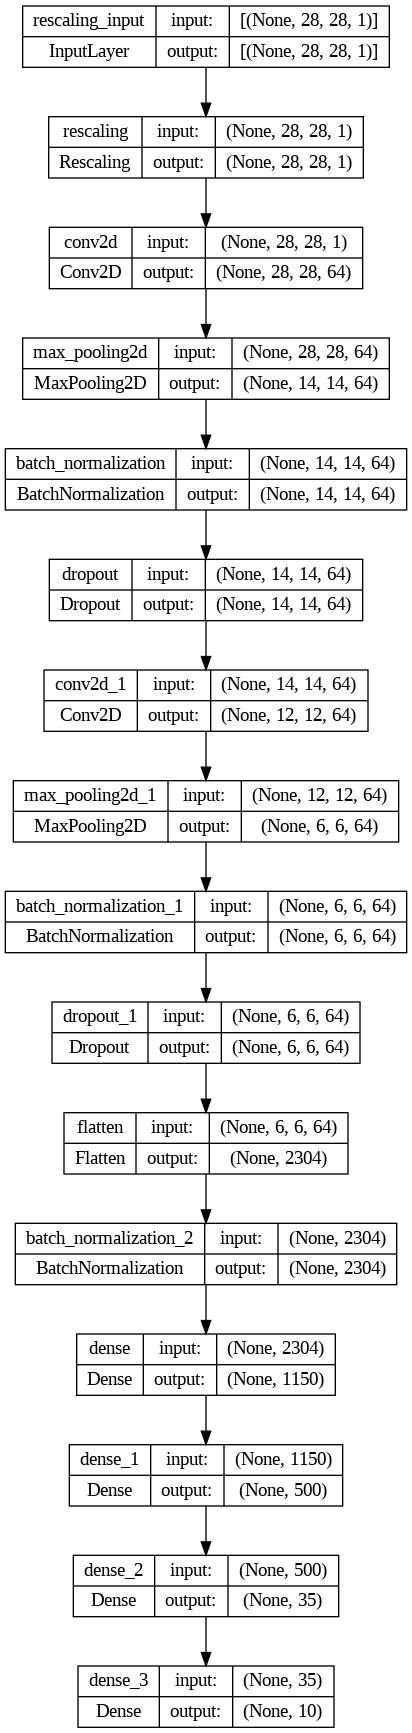

In [14]:
# Display the model architecture plot
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
train_labels

array([7, 3, 5, ..., 6, 6, 1], dtype=uint8)

In [16]:
epocs = 100
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=epocs)

Epoch 1/100
1500/1500 [==============================] - 19s 6ms/step - loss: 1.6585 - accuracy: 0.3916 - val_loss: 1.0738 - val_accuracy: 0.5782
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6381 - accuracy: 0.7762 - val_loss: 0.4551 - val_accuracy: 0.8633
Epoch 3/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4601 - accuracy: 0.8533 - val_loss: 0.3868 - val_accuracy: 0.8794
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3885 - accuracy: 0.8748 - val_loss: 0.3523 - val_accuracy: 0.8840
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3668 - accuracy: 0.8848 - val_loss: 0.3195 - val_accuracy: 0.8992
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3530 - accuracy: 0.8884 - val_loss: 0.3472 - val_accuracy: 0.8975
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3370 - accuracy: 0.8948 - val_loss: 0.3757 - val

# saving the model

In [17]:
# To save the model
from keras.models import load_model
model.save("/content/drive/MyDrive/saved_models/fashion_mnist.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot the Accuracy and Loss for Training and validation

In [18]:

#Using the history method we can convert the history object created into Dataframe
import pandas as pd
df_his = pd.DataFrame(history.history)
df_his.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.658510,0.391583,1.073773,0.578167
1,0.638120,0.776187,0.455111,0.863250
2,0.460120,0.853333,0.386767,0.879417
3,0.388528,0.874750,0.352310,0.884000
4,0.366794,0.884750,0.319533,0.899167
5,0.352987,0.888417,0.347226,0.897500
6,0.336954,0.894813,0.375706,0.891333
7,0.336945,0.894938,0.373954,0.906333
8,0.321942,0.900667,0.370245,0.885250
9,0.313413,0.903229,0.352154,0.902750


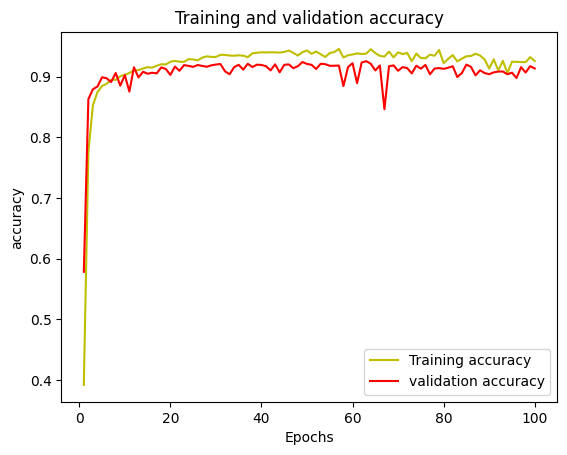

In [19]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'y',label='Training accuracy')
plt.plot(epochs,val_acc,"r",label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

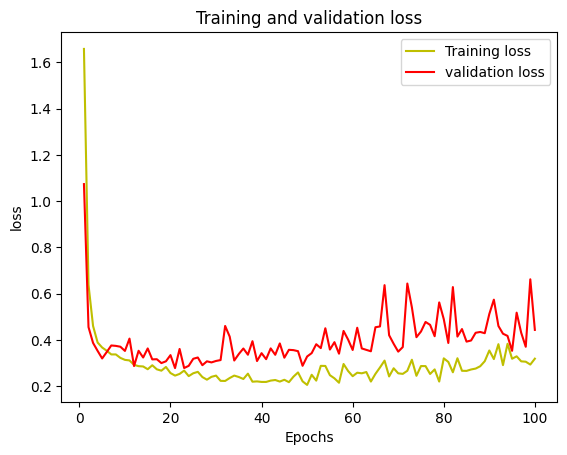

In [20]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,"r",label = "validation loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

#  prediction of test data

In [21]:
test_data = test[0]
test_label = test[1]

# reshaping
test_data = np.array(test_data).reshape(-1,Img_size,Img_size,1)

In [22]:
prediction_probabilities = model.predict(test_data)

313/313 [==============================] - 2s 4ms/step


In [23]:
predicted_labels = []
for class_prob in prediction_probabilities:
  label = np.argmax(class_prob)
  predicted_labels.append(label)

In [24]:
print("Predicted labels",len(predicted_labels))
print("Test_lable" ,len(test_label ))

Predicted labels 10000
Test_lable 10000


In [25]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(test_label, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.77%


<Axes: >

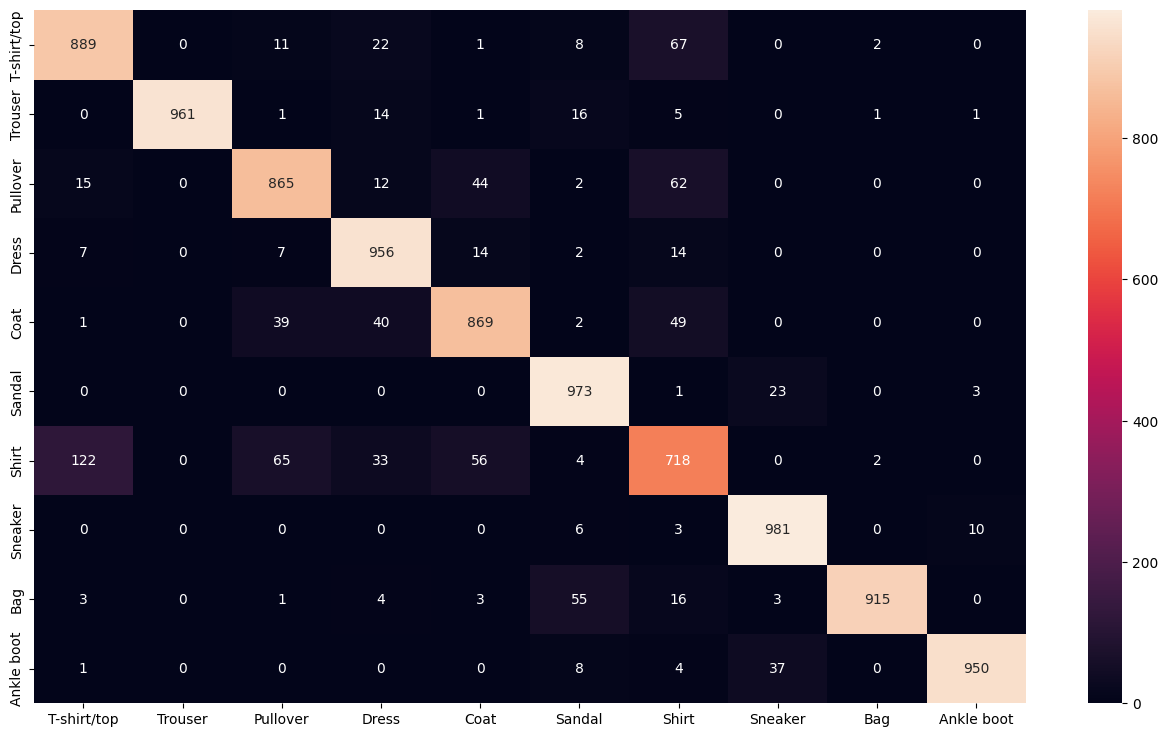

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
confusion_matrices = confusion_matrix(test_label,predicted_labels)
sns.heatmap(confusion_matrices,annot=True,fmt='d',xticklabels=class_names,yticklabels= class_names)

In [27]:
from sklearn.metrics import classification_report
cr = classification_report(test_label,predicted_labels,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.87      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.87      0.86      0.87      1000
       Dress       0.88      0.96      0.92      1000
        Coat       0.88      0.87      0.87      1000
      Sandal       0.90      0.97      0.94      1000
       Shirt       0.76      0.72      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.92      0.95      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Model 2

In [28]:
model = Sequential([
        layers.Rescaling(1/255,input_shape = (height,width,image_channel)),
        layers.Conv2D(32,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
         layers.Dropout(0.1),


        layers.Conv2D(64,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Flatten(),
        layers.BatchNormalization(),

        # hidden layers or classification layers
        layers.Dense(1000,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L1L2(l1=1e-2, l2=1e-2)),
        #layers.Dense(210,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L1L2(l1=1e-2, l2=1e-2)),
        layers.Dense(35,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L1L2(l1=1e-2, l2=1e-2)),

        # final layer
        layers.Dense(10,activation="softmax")])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)       

In [29]:
opt = keras.optimizers.Adam(learning_rate=0.06)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

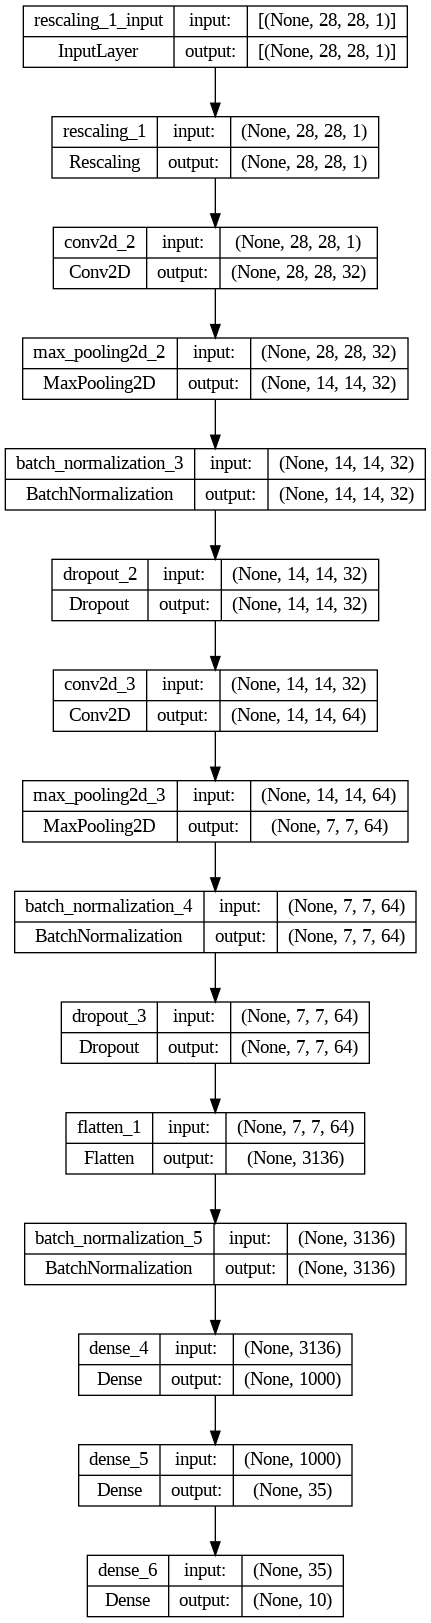

In [30]:
# Display the model architecture plot
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [31]:
epocs = 100
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=epocs)

Epoch 1/100
1500/1500 [==============================] - 13s 6ms/step - loss: 11.4354 - accuracy: 0.7522 - val_loss: 4.4696 - val_accuracy: 0.7897
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 4.3553 - accuracy: 0.8264 - val_loss: 4.2659 - val_accuracy: 0.8553
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 4.2496 - accuracy: 0.8544 - val_loss: 4.1189 - val_accuracy: 0.8708
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 4.1881 - accuracy: 0.8664 - val_loss: 4.1419 - val_accuracy: 0.8789
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 4.1494 - accuracy: 0.8732 - val_loss: 4.0268 - val_accuracy: 0.8895
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 4.1082 - accuracy: 0.8757 - val_loss: 4.1693 - val_accuracy: 0.8904
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 4.0840 - accuracy: 0.8806 - val_loss: 4.0543 - va

In [32]:

#Using the history method we can convert the history object created into Dataframe
import pandas as pd
df_his = pd.DataFrame(history.history)
df_his.head(10)

,loss,accuracy,val_loss,val_accuracy
0,11.435450,0.752187,4.469563,0.789667
1,4.355261,0.826375,4.265857,0.855333
2,4.249588,0.854437,4.118899,0.870833
3,4.188123,0.866375,4.141886,0.878917
4,4.149395,0.873208,4.026832,0.889500
5,4.108214,0.875687,4.169322,0.890417
6,4.084029,0.880583,4.054297,0.886750
7,4.045236,0.883833,4.052879,0.881417
8,4.042218,0.884229,4.032156,0.888500
9,4.012851,0.885896,3.961963,0.899917


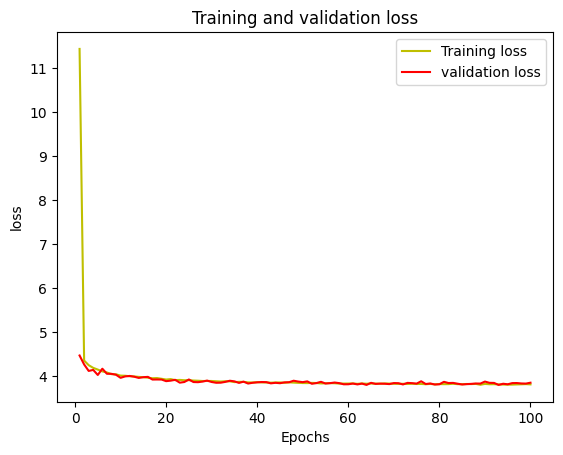

In [33]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,"r",label = "validation loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

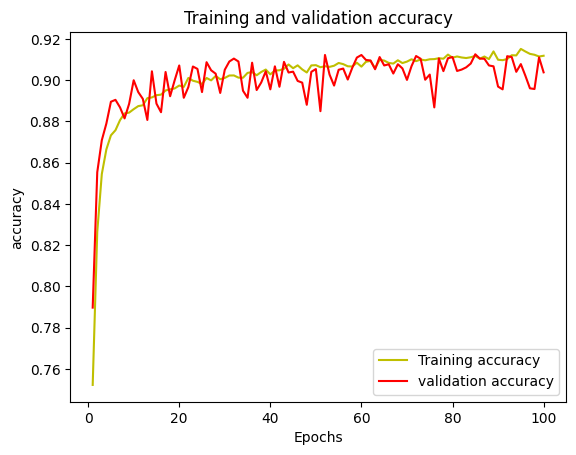

In [34]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'y',label='Training accuracy')
plt.plot(epochs,val_acc,"r",label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [35]:
test_data = test[0]
test_label = test[1]

# reshaping
test_data = np.array(test_data).reshape(-1,Img_size,Img_size,1)

In [36]:
prediction_probabilities = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [37]:
predicted_labels = []
for class_prob in prediction_probabilities:
  label = np.argmax(class_prob)
  predicted_labels.append(label)

In [38]:
print("Predicted labels",len(predicted_labels))
print("Test_lable" ,len(test_label ))

Predicted labels 10000
Test_lable 10000


In [39]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(test_label, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.86%


<Axes: >

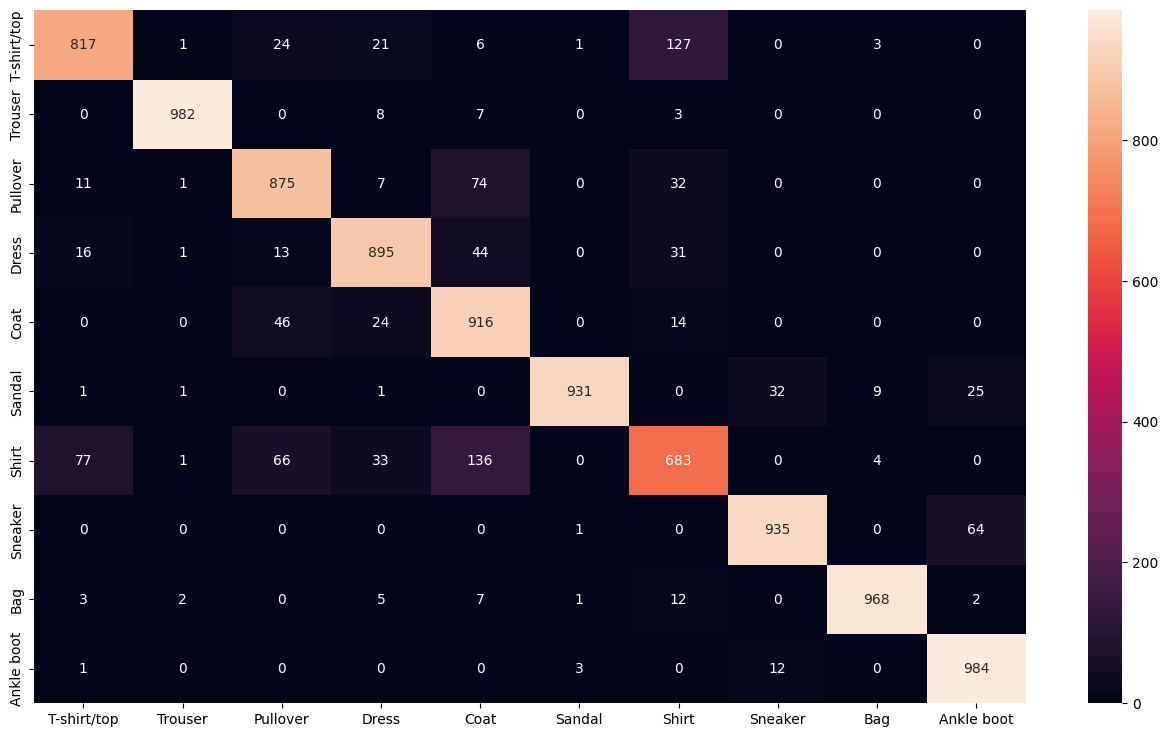

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
confusion_matrices = confusion_matrix(test_label,predicted_labels)
sns.heatmap(confusion_matrices,annot=True,fmt='d',xticklabels=class_names,yticklabels= class_names)

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(test_label,predicted_labels,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.88      0.86      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.77      0.92      0.84      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.96      0.94      0.94      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [42]:
model = Sequential([
        layers.Rescaling(1/255,input_shape = (height,width,image_channel)),
        layers.Conv2D(32,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
         layers.Dropout(0.1),


        layers.Conv2D(64,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Flatten(),
        layers.BatchNormalization(),

        # hidden layers or classification layers
        layers.Dense(1000,activation = "relu"),
        layers.Dense(210,activation = "relu"),
        layers.Dense(35,activation = "relu"),

        # final layer
        layers.Dense(10,activation="softmax")])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)       

In [43]:
opt = keras.optimizers.Adam(learning_rate=0.045)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [44]:
epocs = 100
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=epocs)

Epoch 1/100
1500/1500 [==============================] - 13s 7ms/step - loss: 0.4186 - accuracy: 0.8521 - val_loss: 0.3327 - val_accuracy: 0.8870
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2906 - accuracy: 0.8960 - val_loss: 0.2765 - val_accuracy: 0.8992
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2563 - accuracy: 0.9074 - val_loss: 0.2800 - val_accuracy: 0.8963
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2299 - accuracy: 0.9163 - val_loss: 0.2314 - val_accuracy: 0.9162
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2023 - accuracy: 0.9248 - val_loss: 0.2713 - val_accuracy: 0.9057
Epoch 6/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1858 - accuracy: 0.9321 - val_loss: 0.2350 - val_accuracy: 0.9167
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1685 - accuracy: 0.9385 - val_loss: 0.2555 - val

In [45]:

#Using the history method we can convert the history object created into Dataframe
import pandas as pd
df_his = pd.DataFrame(history.history)
df_his.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.418623,0.852083,0.332735,0.887000
1,0.290597,0.895958,0.276465,0.899167
2,0.256341,0.907438,0.280034,0.896333
3,0.229866,0.916271,0.231368,0.916167
4,0.202302,0.924792,0.271255,0.905750
5,0.185846,0.932125,0.234963,0.916667
6,0.168523,0.938542,0.255507,0.913083
7,0.150153,0.944542,0.233352,0.926917
8,0.141654,0.949417,0.233873,0.923583
9,0.125889,0.953854,0.252721,0.920250


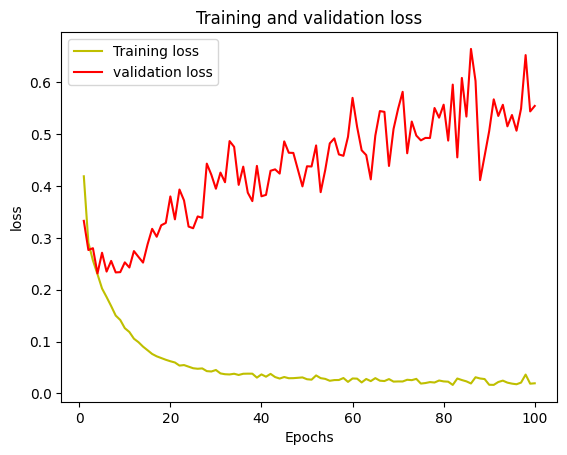

In [46]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,"r",label = "validation loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

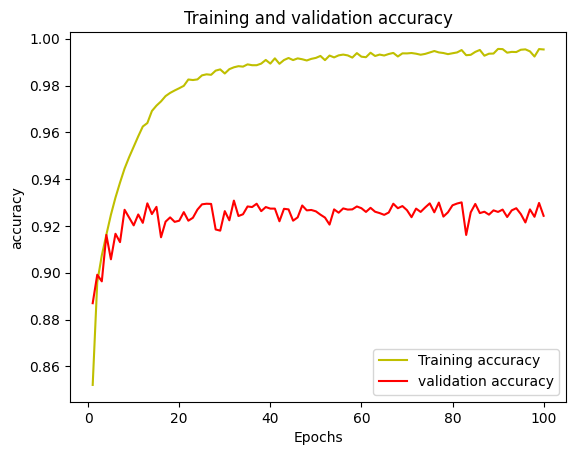

In [47]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'y',label='Training accuracy')
plt.plot(epochs,val_acc,"r",label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [48]:
test_data = test[0]
test_label = test[1]

# reshaping
test_data = np.array(test_data).reshape(-1,Img_size,Img_size,1)
prediction_probabilities = model.predict(test_data)

predicted_labels = []
for class_prob in prediction_probabilities:
  label = np.argmax(class_prob)
  predicted_labels.append(label)

print("Predicted labels",len(predicted_labels))
print("Test_lable" ,len(test_label ))

from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(test_label, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step
Predicted labels 10000
Test_lable 10000
Accuracy: 91.92%


<Axes: >

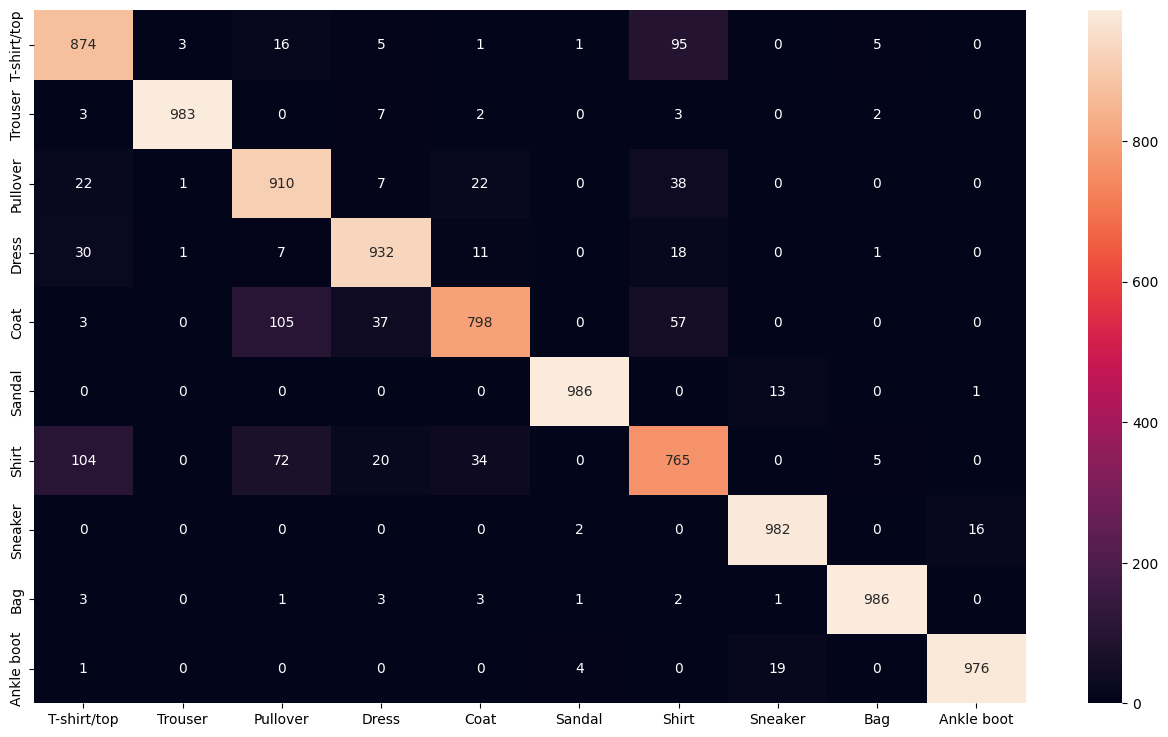

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
confusion_matrices = confusion_matrix(test_label,predicted_labels)
sns.heatmap(confusion_matrices,annot=True,fmt='d',xticklabels=class_names,yticklabels= class_names)

In [50]:
from sklearn.metrics import classification_report
cr = classification_report(test_label,predicted_labels,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.82      0.91      0.86      1000
       Dress       0.92      0.93      0.93      1000
        Coat       0.92      0.80      0.85      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.78      0.77      0.77      1000
     Sneaker       0.97      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Data agumentation

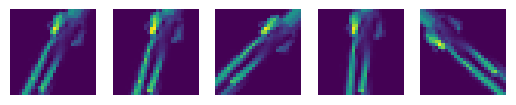

In [11]:
# Create data augmentation object
data_augmentor = ImageDataGenerator(rotation_range=50,
                                    width_shift_range=0.01,
                                    height_shift_range=0.01)



data_augmentor.fit(train_data)

# fit the training data
data_augmentor.fit(train_data)

augment = data_augmentor.flow(train_data[1:2], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [12]:
train,test=fashion_mnist .load_data()
data = train[0]
labels = train[1]
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

print("train labels : ",len(train_labels))
print("test labels",len(train_data))

print("val data",len(val_data))
print("val labels",len(val_labels))

print("test data :",len(test[0]))
print("test lables :",len(test[1]))



Img_size = 28
train_data = np.array(train_data).reshape(-1,Img_size,Img_size,1)
val_data= np.array(val_data).reshape(-1,Img_size,Img_size,1)

print("Dimension shape  of Training ", train_data.shape)
print("Dimension shape of validation",val_data.shape)


train_generator = data_augmentor.flow(train_data,train_labels, batch_size=32)
validation = data_augmentor.flow(val_data,val_labels, batch_size=32)

train labels :  48000
test labels 48000
val data 12000
val labels 12000
test data : 10000
test lables : 10000
Dimension shape  of Training  (48000, 28, 28, 1)
Dimension shape of validation (12000, 28, 28, 1)


In [23]:
model = Sequential([
        layers.Rescaling(1/255,input_shape = (height,width,image_channel)),
        layers.Conv2D(32,3,activation = "relu",padding = "same"),
        layers.Conv2D(32,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
         layers.Dropout(0.1),


        layers.Conv2D(64,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Conv2D(128,3,activation = "relu",padding = "same"),
        layers.MaxPool2D(2),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.BatchNormalization(),

        # hidden layers or classification layers
        layers.Dense(25000,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L2(l2=1e-3)),
        #layers.Dense(4000,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L2(l2=1e-3)),
        layers.Dense(200,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L2(l2=1e-3)),
        layers.Dense(35,activation = "relu",use_bias=True,kernel_regularizer=regularizers.L2(l2=1e-3)),

        # final layer
        layers.Dense(10,activation="softmax")])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_17 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)       

In [24]:
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
epocs = 100
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=epocs)

Epoch 1/100
1500/1500 [==============================] - 32s 19ms/step - loss: 1.0589 - accuracy: 0.8174 - val_loss: 0.5594 - val_accuracy: 0.8660
Epoch 2/100
1500/1500 [==============================] - 30s 20ms/step - loss: 0.4712 - accuracy: 0.8819 - val_loss: 0.3794 - val_accuracy: 0.9046
Epoch 3/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3700 - accuracy: 0.8996 - val_loss: 0.3506 - val_accuracy: 0.8993
Epoch 4/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3272 - accuracy: 0.9071 - val_loss: 0.3036 - val_accuracy: 0.9153
Epoch 5/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3013 - accuracy: 0.9148 - val_loss: 0.3047 - val_accuracy: 0.9097
Epoch 6/100
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2854 - accuracy: 0.9181 - val_loss: 0.2903 - val_accuracy: 0.9137
Epoch 7/100
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2678 - accuracy: 0.9232 - val_loss: 0

In [25]:
#Using the history method we can convert the history object created into Dataframe
import pandas as pd
df_his = pd.DataFrame(history.history)
df_his.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.058919,0.817375,0.559390,0.866000
1,0.471156,0.881854,0.379399,0.904583
2,0.369974,0.899646,0.350645,0.899333
3,0.327153,0.907062,0.303619,0.915250
4,0.301302,0.914792,0.304690,0.909667
5,0.285429,0.918063,0.290283,0.913750
6,0.267750,0.923229,0.292413,0.916583
7,0.261050,0.925583,0.262857,0.921417
8,0.249310,0.928271,0.268539,0.919250
9,0.240851,0.930792,0.245190,0.930167


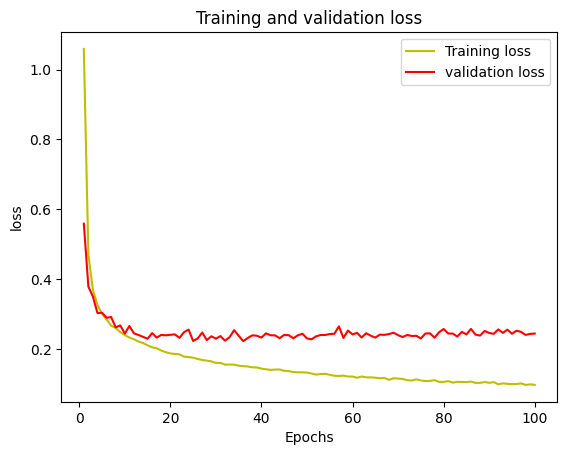

In [26]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,"r",label = "validation loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

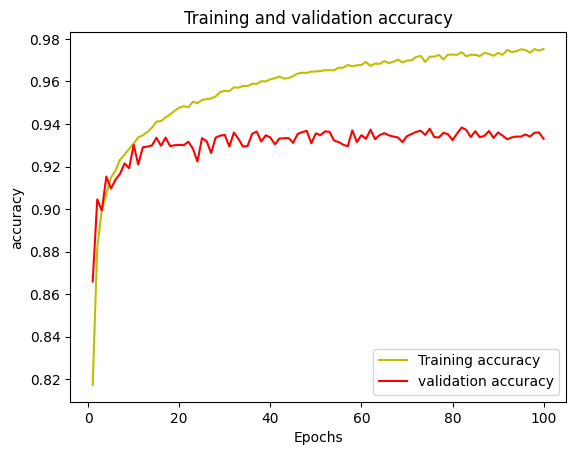

In [27]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'y',label='Training accuracy')
plt.plot(epochs,val_acc,"r",label = "validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [28]:
test_data = test[0]
test_label = test[1]

# reshaping
test_data = np.array(test_data).reshape(-1,Img_size,Img_size,1)
prediction_probabilities = model.predict(test_data)

predicted_labels = []
for class_prob in prediction_probabilities:
  label = np.argmax(class_prob)
  predicted_labels.append(label)

print("Predicted labels",len(predicted_labels))
print("Test_lable" ,len(test_label ))

from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(test_label, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step
Predicted labels 10000
Test_lable 10000
Accuracy: 93.07%


<Axes: >

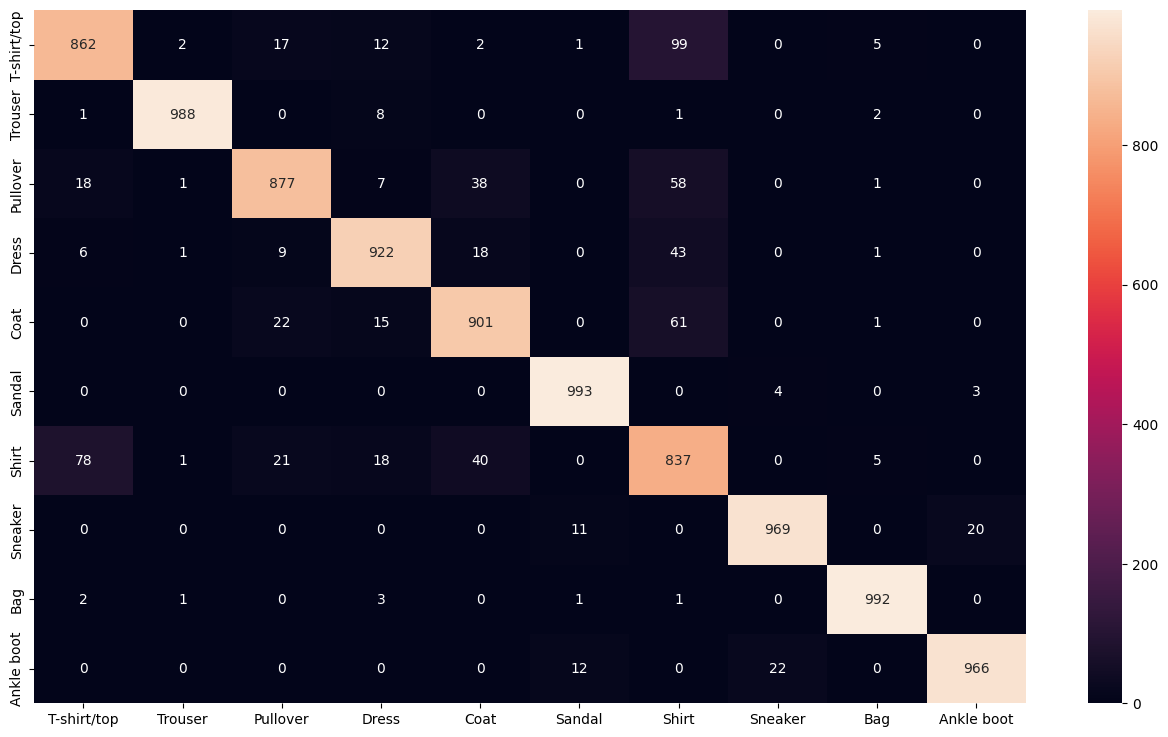

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
confusion_matrices = confusion_matrix(test_label,predicted_labels)
sns.heatmap(confusion_matrices,annot=True,fmt='d',xticklabels=class_names,yticklabels= class_names)

In [30]:
from sklearn.metrics import classification_report
cr = classification_report(test_label,predicted_labels,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.86      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.93      0.88      0.90      1000
       Dress       0.94      0.92      0.93      1000
        Coat       0.90      0.90      0.90      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.76      0.84      0.80      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

